In [ ]:
from pydrake.math import sin
from pydrake.all import MathematicalProgram
import numpy as np
import matplotlib.pyplot as plt

In [63]:
m = 1. # mass of the wheel
g = 10. # gravity acceleration
l = 1. # length of the spoke
a = np.pi/8 # half angle between the spokes
T = .5 # period
N = 5 # time steps per period

In [64]:
def continuous_dynamics(x, u):
    return np.array([x[1], g/l*sin(x[0]) + u/m/l**2])

In [65]:
def optimal_limit_cycle():
    h = T/N
    mp = MathematicalProgram()
    x = [mp.NewContinuousVariables(2, 'x_0')]
    u = []
    cost = 0.
    for t in range(N):
        u.append(mp.NewContinuousVariables(1, 'u_%d'%t)[0])
        x.append(mp.NewContinuousVariables(2, 'x_%d'%(t+1)))
        x_dot = continuous_dynamics(x[-2], u[-1])
        for i in range(2):
            mp.AddConstraint(x[-1][i] == x[-2][i] + h*x_dot[i])
        cost += u[-1]**2
    mp.AddConstraint(x[0][0] == -a)
    mp.AddConstraint(x[-1][0] == a)
    mp.AddConstraint(x[0][1] == x[-1][1]*np.cos(2*a))
    mp.Solve()
    return mp.GetSolution(x), mp.GetSolution(u)

In [80]:
def plot_state_space_trajectory(x):
    plt.plot([x_t[0] for x_t in x], [x_t[1] for x_t in x])
    plt.scatter([x_t[0] for x_t in x], [x_t[1] for x_t in x])
    for t, x_t in enumerate(x):
        plt.text(x_t[0], x_t[1], r'$x(%d)$'%t)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')

In [81]:
def plot_vector_field(x_min, x_max):
    n = 11
    x1 = np.linspace(x_min[0], x_max[0], n)
    x2 = np.linspace(x_min[1], x_max[1], n)
    X1, X2 = np.meshgrid(x1, x2)
    F1 = np.array([continuous_dynamics([i,j], 0.)[0] for i, j in zip(np.ravel(X1), np.ravel(X2))]).reshape(n, n)
    F2 = np.array([continuous_dynamics([i,j], 0.)[1] for i, j in zip(np.ravel(X1), np.ravel(X2))]).reshape(n, n)
    M = np.hypot(F1, F2)
    Q = plt.quiver(X1, X2, F1, F2, M)
    plt.axis('equal')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')

In [82]:
def plot_input(u):
    t = np.linspace(0, T, N+1)
    plt.step(t, [u[0]] + list(u), 'b')

(1.4, 2.3)

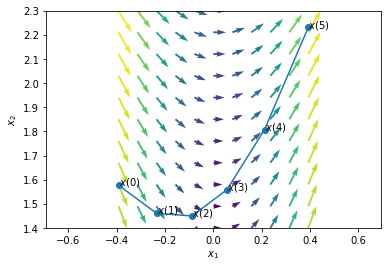

In [83]:
x_min = [-a,1.4]
x_max = [a,2.3]
plot_vector_field(x_min, x_max)
x_opt, u_opt = optimal_limit_cycle()
plot_state_space_trajectory(x_opt)
plt.xlim(x_min[0], x_max[0])
plt.ylim(x_min[1], x_max[1])

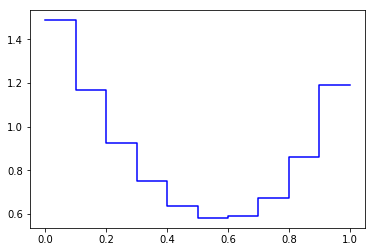

In [62]:
plot_input(u_opt)